## Reading and plotting the content of a GPR .dzt file:
#### We need to import all the modules
- readgssi will make available the reading function
- matplotlib will provide many plotting tools
- numpy will perform all the numerical work

In [4]:
from readgssi.readgssi import readgssi as readDZT
import matplotlib.pyplot as plt
import numpy as np

**Now let's read the GPR section we have and separate what is the actual data and what is the header info. Also, we need to assign the values we are going to use for the x and y axis.**

In [11]:
file_name = "FILE____125.DZT"
d = readDZT(file_name, x = 'm')
data = d[1][0]
header = d[0]
xmax = data.shape[1]/ header['rhf_spm']
zmax = header['ns_per_zsample'] * data.shape[0] * 10**9
extent = [0, xmax, zmax, 0]

2019-07-31 22:55:21 - WARNING: no DZG file found for GPS input
2019-07-31 22:55:21 - WARNING: no time zero specified for channel 0, defaulting to 2


**To plot the radargram, we use an image. Let's also set the plot labels and title.**

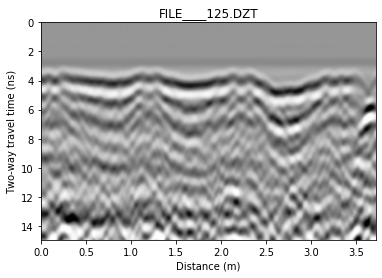

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(data, cmap = "Greys", interpolation="bicubic", extent = extent, aspect='auto')
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Two-way travel time (ns)")
ax.set_title(file_name)
plt.show()